# EMQQ

In this notebook we play with data from the emerging markets internet &  ecommerce etf. 

In [115]:
import os
import logging
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt

from matplotlib import cm

df = pd.read_csv("data/emqq-holdings-03-28-2021.csv",
                sep=",")

df["%"] = df["% OF NET ASSET VALUES"].apply(lambda x:float(x[:-1]))
df.head()

,COMPANY NAME,TICKER,FIGI,SHARES,MARKET VALUE,% OF NET ASSET VALUES,%
0,ALIBABA GROUP HOLDING-SP ADR,BABA,BBG006G2JVL2,646008,1.438789e+08,8.30%,8.30
1,TENCENT HOLDINGS LTD,700 HK,BBG000BJ35F4,1773992,1.383764e+08,7.98%,7.98
2,MEITUAN,3690 HK,BBG00LLV9WV7,3503300,1.295990e+08,7.47%,7.47
3,JD.COM INC,JD,BBG005YHY0Q7,1394731,1.097793e+08,6.33%,6.33
4,NASPERS LTD-N SHS,NPN SJ,BBG000CTYB00,474416,1.085018e+08,6.26%,6.26


In [86]:
"$%.1f" % (df["MARKET VALUE"].sum())

'$1733768463.5'

In [87]:
df.tail()

,COMPANY NAME,TICKER,FIGI,SHARES,MARKET VALUE,% OF NET ASSET VALUES,%
93,KGINICIS CO LTD,035600 KS,BBG000PM6F03,21081,353458.35,0.02%,0.02
94,PHOENIX TREE HOLDINGS LTD,DNK,BBG00QQ109W6,179833,425664.71,0.02%,0.02
95,YUNJI INC,YJ,BBG00NPL7MC6,138161,297046.15,0.02%,0.02
96,PC HOME ONLINE INC,8044 TT,BBG000DCXLY8,123000,378355.70,0.02%,0.02
97,CASH & OTHER,NaN,NaN,8140731,8140731.57,0.47%,0.47


In [25]:
ticker = list(df.TICKER)

def _read_ticker(ticker):
    tmp = pandas_datareader.get_data_tiingo(
        ticker, api_key=os.getenv('TIINGO_API_KEY'))
    tmp = tmp.reset_index().set_index("date").rename(
            columns={"close": ticker})[[ticker]]
    return tmp

_read_ticker(ticker[0]).head()

,BABA
date,
2016-03-29 00:00:00+00:00,78.08
2016-03-30 00:00:00+00:00,78.86
2016-03-31 00:00:00+00:00,79.03
2016-04-01 00:00:00+00:00,78.73
2016-04-04 00:00:00+00:00,79.08


In [26]:
data = []
for tick in ticker:
    try:
        val = _read_ticker(tick)
        data.append(val)
    except:
        logging.warning("skipping %s" %tick)
    
len(data)

48

In [100]:
tmp = data[0]
for d in data[1:]:
    tmp = tmp.join(d)

df2 = tmp
df2.head()

,BABA,JD,PDD,MELI,NTES,BEKE,BIDU,LU,SE,CPNG,...,AFYA,LX,SY,QIWI,SOGO,DUO,QTT,BLCT,DNK,YJ
date,,,,,,,,,,,,,,,,,,,,,
2016-03-29 00:00:00+00:00,78.08,26.42,NaN,118.28,138.86,NaN,189.84,NaN,NaN,NaN,...,NaN,NaN,NaN,13.76,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-30 00:00:00+00:00,78.86,27.24,NaN,117.68,142.63,NaN,189.89,NaN,NaN,NaN,...,NaN,NaN,NaN,14.10,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31 00:00:00+00:00,79.03,26.50,NaN,117.85,143.58,NaN,190.88,NaN,NaN,NaN,...,NaN,NaN,NaN,14.49,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 00:00:00+00:00,78.73,26.76,NaN,120.62,143.02,NaN,190.33,NaN,NaN,NaN,...,NaN,NaN,NaN,13.93,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-04 00:00:00+00:00,79.08,26.64,NaN,118.61,141.31,NaN,188.97,NaN,NaN,NaN,...,NaN,NaN,NaN,13.82,NaN,NaN,NaN,NaN,NaN,NaN


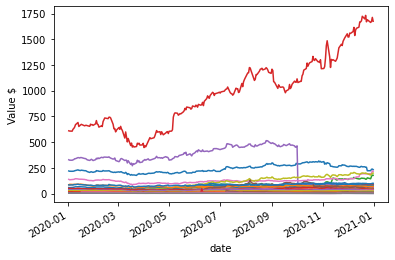

In [101]:
ax = df2.loc["2020"].plot()
plt.ylabel("Value $")
ax.get_legend().remove()

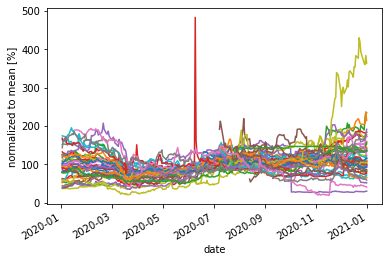

In [102]:
ax = df2.loc["2020"].apply(lambda x: x/(x.mean()/100), axis=0).plot()
plt.ylabel("normalized to mean [%]")
ax.get_legend().remove()

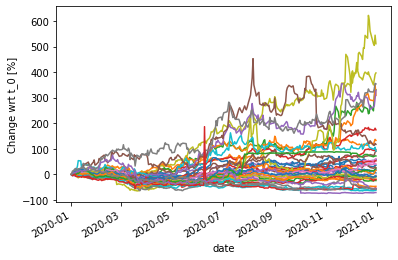

In [146]:
ax = df2.loc["2020"].apply(
    lambda x: (x - x[0])/(x[0]/100), axis=0).plot()

plt.ylabel("Change wrt t_0 [%]")
ax.get_legend().remove()

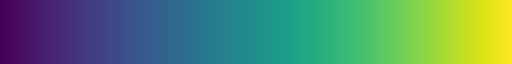

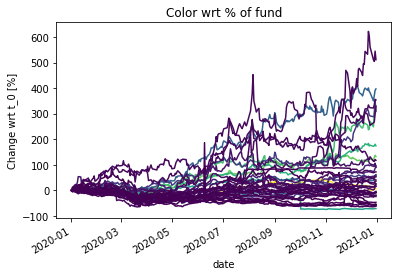

In [148]:
cmap = cm.get_cmap('viridis', (df["%"] * 100).astype(int).max())

tmp = df2.loc["2020"].apply(lambda x: (x - x[0])/(x[0]/100), axis=0)

_per = lambda x : (df.query(
    "TICKER == '%s'" %tmp.columns[x])["%"] * 100).astype(int).item()
_cmap = lambda x: cmap(_per(x))

_plot = lambda x: tmp[tmp.columns[x]].plot(color=_cmap(x))

for _ in range(len(tmp.columns)):
    _plot(_)
plt.ylabel("Change wrt t_0 [%]")
plt.title("Color wrt % of fund")
cmap